In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import chart_studio.plotly as py

# https://data.world/chhs/bba07a91-bf3f-438b-b7c9-92e6ce351f62/workspace/file?filename=suicide-deaths-per-100-000-population-lghc-indicator-3.xlsx
    

In [29]:
df=pd.read_csv('data/suicide-lghc-indicator-21.csv')
df.head()

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067
1,Suicide,CALIFORNIA,2000,Sex,Male,2431,16920000,14.370,15.890
2,Suicide,CALIFORNIA,2000,Sex,Total,3113,34000000,9.156,9.564
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005
4,Suicide,CALIFORNIA,2001,Sex,Male,2571,17170000,14.970,16.410


In [30]:
df.isnull().sum()

Indicator            0
Geography            0
Year                 0
Strata               0
Strata Name          0
Numerator            0
Denominator          0
Rate                 0
Age Adjusted Rate    0
dtype: int64

# Gender

In [31]:
# using plotly
import plotly.express as px
# create a function to select specific dataset
def select_df(var):
    california=df[df.Geography=='CALIFORNIA']
    return california[california['Strata Name']==var]
# apply the funtion above to obtian aimed datasets
female=select_df('Female')[:18]
male=select_df('Male')[:18]
# concate the datasets
gender=pd.concat([female,male])
# line plot using plotly
fig = px.line( gender,x="Year", y="Rate", color='Strata Name',title='Suicide Rate by Gender from 2000 - 2017')
fig.show()

In [32]:
# # save it as an interactive chart
# py.plot(fig, filename = 'gender', auto_open=True)

In [33]:
# # create a function for it 
# def save_to_chart_studio(fig,title):
#     return py.plot(fig, filename = title, auto_open=True)

In [34]:
gender.head()

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005
6,Suicide,CALIFORNIA,2002,Sex,Female,710,17550000,4.045,4.088
9,Suicide,CALIFORNIA,2003,Sex,Female,733,17780000,4.122,4.150
12,Suicide,CALIFORNIA,2004,Sex,Female,821,17970000,4.569,4.576


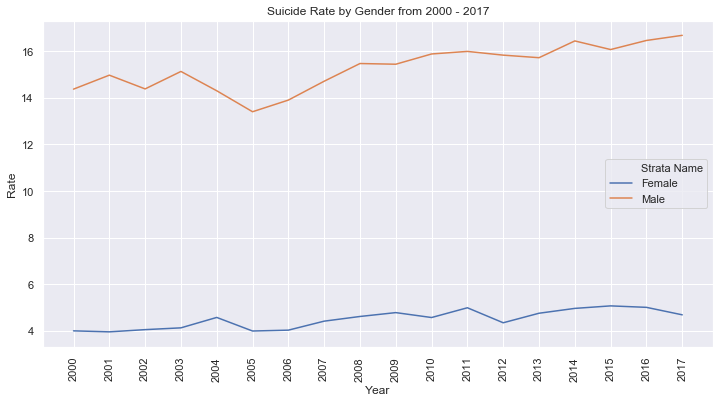

In [35]:
# using matpltlib to make a line plot
plt.figure(figsize=(12,6))
sns.lineplot( x="Year", y="Rate",data=gender,hue='Strata Name')
plt.title('Suicide Rate by Gender from 2000 - 2017')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

In [36]:
print("Mean of Male suicide rate: {}".format(np.mean(male.Rate)))
print("Mean of Female suicide rate: {}".format(np.mean(female.Rate))) 
# male suicide rate is round 3.4 times of female suicide rate 
print(np.mean(male.Rate)/np.mean(female.Rate))

Mean of Male suicide rate: 15.285555555555558
Mean of Female suicide rate: 4.490333333333333
3.4041026402395276


In [37]:
# Why more men than women die by suicide 
# https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women
#men may be less likely to admit when they feel vulnerable, whether to themselves, 
#friends, or a GP. They also can be more reticent than women to see a doctor. 
#A UK British Medical Journal study found general primary care consultation rates were 32% lower in men than women.
#(Consultation rates for depression, assessed by whether patients received antidepressant prescriptions, 
#were 8% lower in men than women).

# Suicide Rate  in California (total)

Text(0.5, 1.0, 'Trend of Suicide Rate in California')

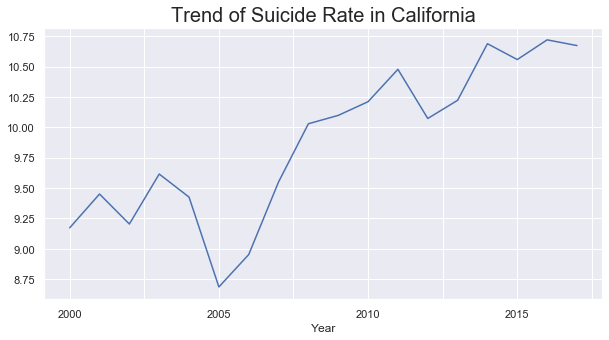

In [42]:
california=pd.read_csv('data/suicide-lghc-indicator-21.csv').iloc[:54]
california.groupby('Year')['Rate'].mean().plot(kind='line',figsize=(10,5))
plt.title('Trend of Suicide Rate in California',fontsize=20)

In [30]:
# using plotly
total=select_df('Total')
fig = px.line(total, x="Year", y="Rate", title='Trend of Suicide Rate in California')
fig.show()

In [31]:
# use the function I just created above to save it to plotly online chart studio 
save_to_chart_studio(fig,"Trend of Suicide Rate in California")

'https://plotly.com/~melaniesoek/24/'

In [699]:
#https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women

# Race/Ethnicity

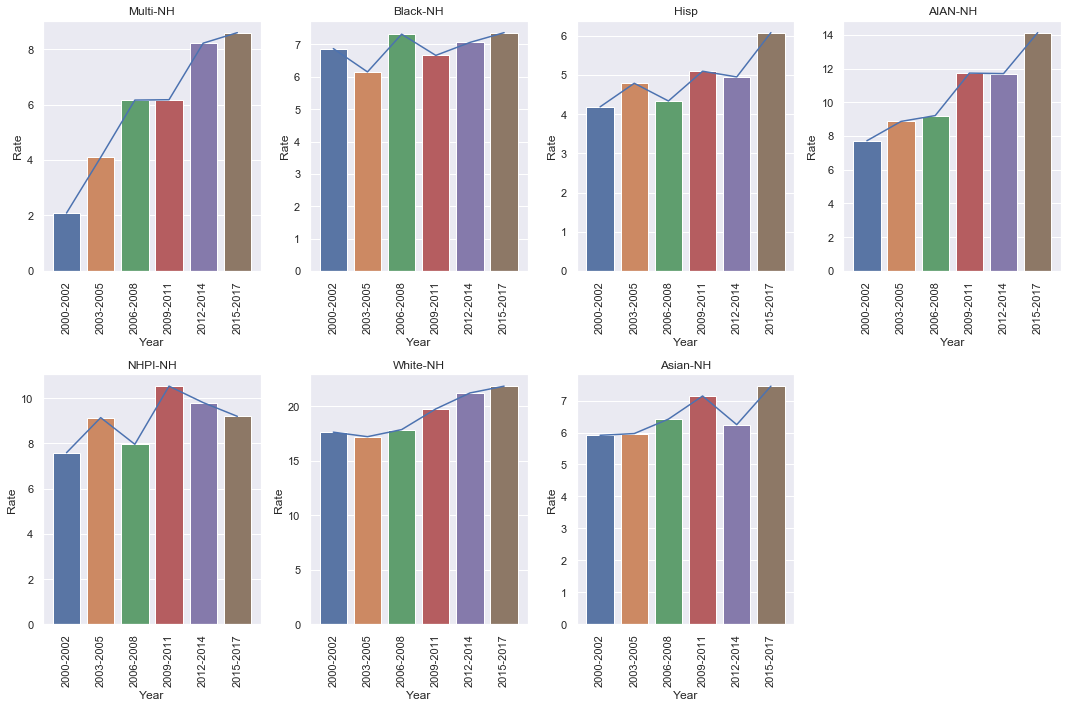

In [47]:
ethnic=pd.DataFrame(df[df['Strata']=='Race/Ethnicity'].sort_values(by='Year').groupby(['Strata Name','Year'])['Rate'].mean()).reset_index()
# plot trend of suicide rate by race 
plt.figure(figsize=(15,10))
for i in range(len(list(set(ethnic['Strata Name'])))):
    plt.subplot(2,4,i+1)
    sns.barplot('Year','Rate',data=ethnic[ethnic['Strata Name']==list(set(ethnic['Strata Name']))[i]],ci=None)
    sns.lineplot('Year','Rate',data=ethnic[ethnic['Strata Name']==list(set(ethnic['Strata Name']))[i]])
    plt.xticks(rotation=90)
    plt.title('{}'.format(list(set(ethnic['Strata Name']))[i]))
    plt.tight_layout()

In [48]:
# line plot using plotly
fig = px.line( ethnic,x="Year", y="Rate", color='Strata Name',title='Suicide Rate by Race')
fig.show()


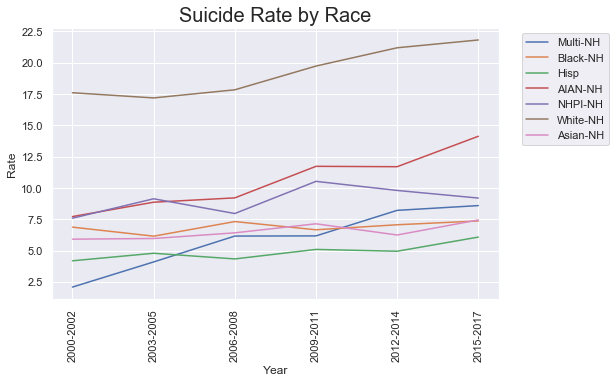

In [51]:
plt.figure(figsize=(8,5))
for i in range(len(list(set(ethnic['Strata Name'])))):
    sns.lineplot('Year','Rate',data=ethnic[ethnic['Strata Name']==list(set(ethnic['Strata Name']))[i]],label='{}'.format(list(set(ethnic['Strata Name']))[i]))
    plt.xticks(rotation=90)
    plt.title('Suicide Rate by Race',fontsize=20)
    plt.legend(loc=9,bbox_to_anchor=(0.9, 0, 0.5, 1))
    

Text(0.5, 0, 'Race/Ethnicity')

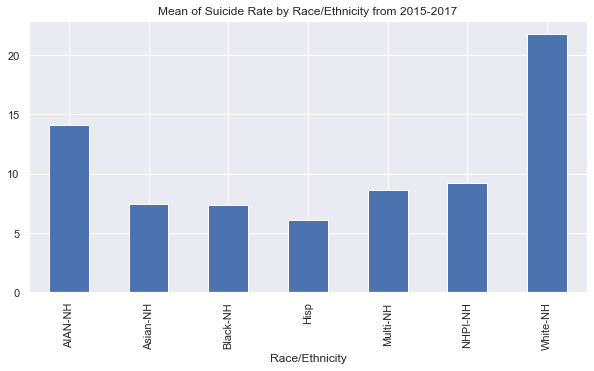

In [60]:
# Take mean of suicide rate from 2000-2017 for each race/ethnicity
ethnic[ethnic['Year']=='2015-2017'].groupby('Strata Name')['Rate'].mean().plot(kind='bar',figsize=(10,5),title='Mean of Suicide Rate by Race/Ethnicity from 2015-2017')
plt.xlabel('Race/Ethnicity')


# Sates/Geography

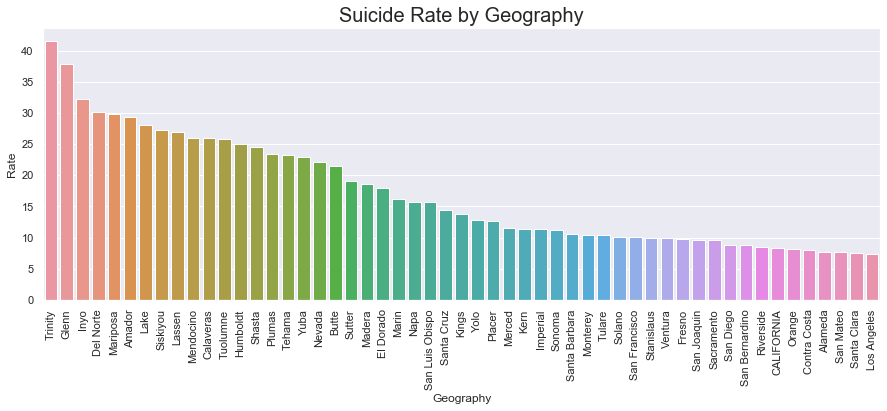

In [62]:
# the mean of suicide rate of each county from 2000-2017
df3=pd.DataFrame(df[df['Strata']=='Race/Ethnicity'].groupby('Geography')['Rate'].mean()).reset_index().sort_values(by='Rate',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot('Geography','Rate',data=df3)
plt.xticks(rotation=90)
plt.title("Suicide Rate by Geography",fontsize=20)
plt.show()

In [54]:
# Create gender dataframe 
gender=df[df['Strata']=='Sex'][df[df['Strata']=='Sex']['Strata Name']!='Total']
# encode Female and Male  into 0 and 1
gender['gender']=gender['Strata Name'].map({'Female':0,'Male':1})
# set up dummy variables for each county
geo_dummy=pd.get_dummies(gender.Geography,drop_first=True)
# add up dummy variavle data with gender data frame
gender[geo_dummy.columns]=geo_dummy
gender.head()
# now we have target: Rate , and other variables: age adjuested rate , gender dummy, geo_dummy

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate,gender,...,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Tehama,Tulare,Ventura,Yolo
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067,0,...,0,0,0,0,0,0,0,0,0,0
1,Suicide,CALIFORNIA,2000,Sex,Male,2431,16920000,14.370,15.890,1,...,0,0,0,0,0,0,0,0,0,0
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005,0,...,0,0,0,0,0,0,0,0,0,0
4,Suicide,CALIFORNIA,2001,Sex,Male,2571,17170000,14.970,16.410,1,...,0,0,0,0,0,0,0,0,0,0
6,Suicide,CALIFORNIA,2002,Sex,Female,710,17550000,4.045,4.088,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# now create race dataframe 
race=df[df['Strata']=='Race/Ethnicity'][df[df['Strata']=='Race/Ethnicity']['Strata Name']!='Total'][['Geography','Year','Strata Name']]
# create dummy variable for race 
race_dummy=pd.get_dummies(race['Strata Name'],drop_first=True)
race[race_dummy.columns]=race_dummy
# merge race and gender 
final_df=pd.merge(race,gender,on=['Geography','Year'])
final_df.head()

,Geography,Year,Strata Name_x,Asian-NH,Black-NH,Hisp,Multi-NH,NHPI-NH,White-NH,Indicator,...,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Tehama,Tulare,Ventura,Yolo
0,Alameda,2000-2002,Asian-NH,1,0,0,0,0,0,Suicide,...,0,0,0,0,0,0,0,0,0,0
1,Alameda,2000-2002,Asian-NH,1,0,0,0,0,0,Suicide,...,0,0,0,0,0,0,0,0,0,0
2,Alameda,2000-2002,Black-NH,0,1,0,0,0,0,Suicide,...,0,0,0,0,0,0,0,0,0,0
3,Alameda,2000-2002,Black-NH,0,1,0,0,0,0,Suicide,...,0,0,0,0,0,0,0,0,0,0
4,Alameda,2000-2002,Hisp,0,0,1,0,0,0,Suicide,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# select Rate, Gender, 'Age Adjusted Rate, Counties' names , different races
final_df=final_df[['Rate','gender','Age Adjusted Rate', 'Butte', 'CALIFORNIA', 'Calaveras',
       'Contra Costa', 'El Dorado', 'Fresno', 'Humboldt', 'Imperial', 'Inyo',
       'Kern', 'Lake', 'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Merced',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside',
       'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Tehama', 'Tulare', 'Ventura', 'Yolo', 'Asian-NH',
       'Black-NH', 'Hisp', 'Multi-NH', 'NHPI-NH', 'White-NH']]

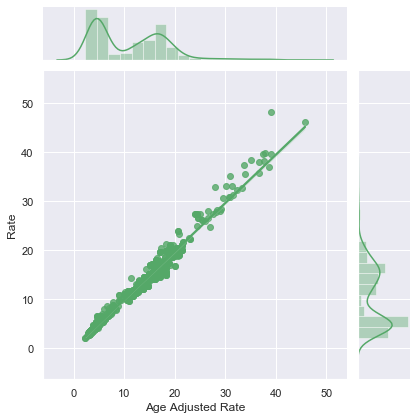

In [57]:
# Age Adjusted Rate VS Suicide Rate in California
sns.jointplot(x='Age Adjusted Rate',y='Rate',data=final_df, kind="reg",color="g")

# Train test split

In [58]:
# decalre inputs and target
target=final_df.Rate
inputs=final_df.drop(columns='Rate')

In [61]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (855, 50) Target:  (855,)
Test set- Features:  (214, 50) Target:  (214,)


In [62]:
# convert np.arrary into dataframe
x_train=pd.DataFrame(data=x_train, columns=x_train.columns)
x_test=pd.DataFrame(data=x_test, columns=x_train.columns)

# Feature Selection


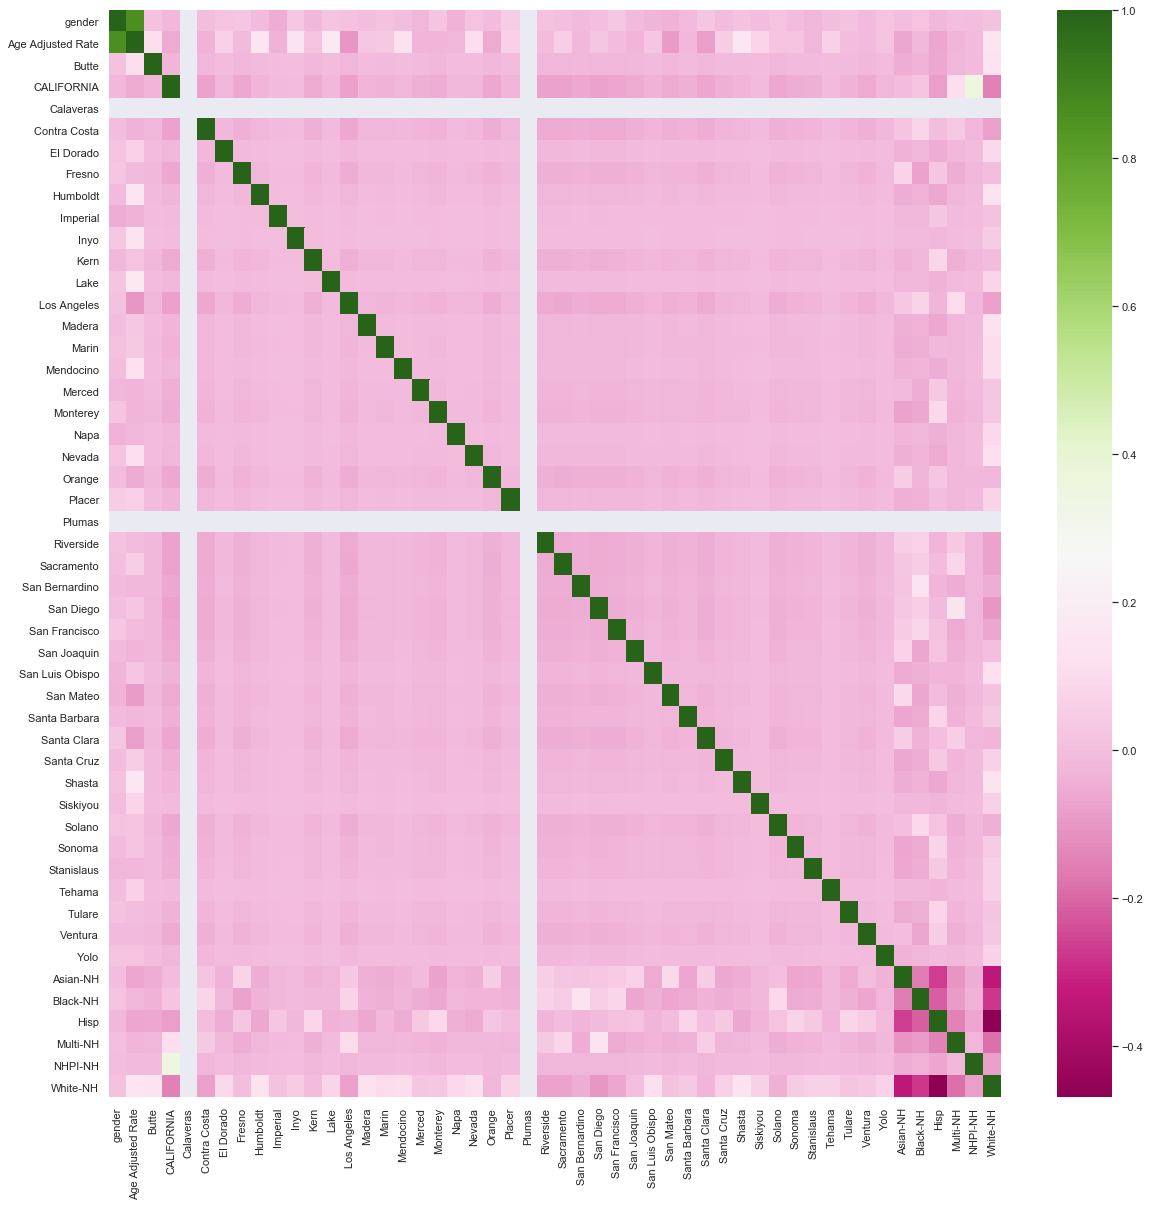

In [641]:
# Generate a custom diverging colormap
# Feature correlaiton heatmap
plt.figure(figsize=(20,20))
sns.heatmap(x_train.corr(),
            square=False,annot=False,cmap="PiYG")
plt.show()

In [671]:
corrlation= abs(x_train.corr())
# Obtianed the dataframe of Correlation 
relevant_features = corrlation[corrlation>0]
relevant_features.head()

,gender,Age Adjusted Rate,Butte,CALIFORNIA,Calaveras,Contra Costa,El Dorado,Fresno,Humboldt,Imperial,...,Tehama,Tulare,Ventura,Yolo,Asian-NH,Black-NH,Hisp,Multi-NH,NHPI-NH,White-NH
gender,1.000000,0.856929,0.012064,0.019140,NaN,0.003860,0.015788,0.026541,0.010857,0.048139,...,0.000283,0.010285,0.012587,0.015788,0.000593,0.016790,0.017633,0.001394,0.000636,0.006969
Age Adjusted Rate,0.856929,1.000000,0.114514,0.055868,NaN,0.035991,0.061609,0.015062,0.140368,0.038055,...,0.061933,0.004623,0.015904,0.015031,0.066219,0.026830,0.064791,0.030248,0.013873,0.149483
Butte,0.012064,0.114514,1.000000,0.031513,NaN,0.024311,0.007911,0.019668,0.010638,0.004994,...,0.004994,0.012816,0.018266,0.007911,0.045445,0.037111,0.062197,0.024595,0.011220,0.132370
CALIFORNIA,0.019140,0.055868,0.031513,1.000000,NaN,0.072015,0.023433,0.058263,0.031513,0.014794,...,0.014794,0.037964,0.054109,0.023433,0.009844,0.021452,0.080133,0.112646,0.356052,0.151743
Calaveras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Scaled data

In [561]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [562]:
x_test.shape,x_train.shape

((214, 50), (855, 50))

# Linear Regression

In [563]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression,RidgeCV,LassoCV, ElasticNetCV

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Score


In [564]:
test_accuracy = reg.score(x_test, y_test)
train_accuracy=reg.score(x_train, y_train)
print("Linear Regression Train Accuracy: {:2f}%".format(train_accuracy*100))
print("Linear Regression test Accuracy: {:2f}%".format(test_accuracy*100 ))

Linear Regression Train Accuracy: 99.244569%
Linear Regression test Accuracy: 98.555552%


## Residual

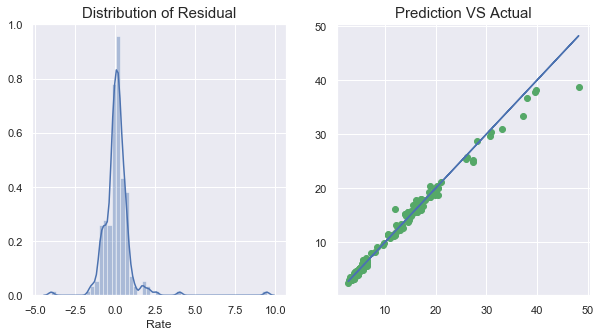

In [565]:
y_test_reg_pred=reg.predict(x_test)
plt.figure(figsize=(10,5))
# distribution of residual 
plt.subplot(1,2,1)
sns.distplot(y_test-y_test_reg_pred)
plt.title('Distribution of Residual',fontsize=15)

plt.subplot(1,2,2)
plt.title('Prediction VS Actual',fontsize=15)
plt.scatter(y_test,y_test_reg_pred,color='g')
plt.plot(y_test,y_test)

# RMSE

In [566]:
lr_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_reg_pred)**2)))
lr_rmse

0.967275429124187

# Ridge regression

## Alphas

In [567]:
# given a list of alphas 
alphas=[14,15,16,17,11,12,13,2, 1.6,1.5, 1.49,1.48,1.47,
        1.46,1.47,1.4,1.3,1.2
        ,1.1, 1.05, 1.01,1.0, 0.5, 
        0.1, 0.05, 0.01, 0.005,
        0.001, 0.0005]

## model

In [568]:
#Obtain optimal lapha
#Gride search to get optimal alpha which is 0.05
model1 = RidgeCV(alphas=alphas, normalize=False)
model1.fit(inputs, target) 
print('The optimal alpha for Ridge model: '+str(model1.alpha_))

The optimal alpha for Ridge model: 2.0


In [569]:
model_ridge = Ridge(alpha=model1.alpha_ ,normalize=False)
model_ridge.fit(x_train, y_train)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Score

In [570]:
train_score_ridge = model_ridge.score(x_train, y_train)  
test_score_ridge = model_ridge.score(x_test, y_test)  
print("Ridge Regression train Accuracy: {:2f}%".format(train_score_ridge * 100))
print("Ridge Regression test Accuracy: {:2f}%".format(test_score_ridge* 100))

Ridge Regression train Accuracy: 97.394290%
Ridge Regression test Accuracy: 94.240978%


## Distribution of Residual

Text(0.5, 1.0, 'Prediction VS Actual Values')

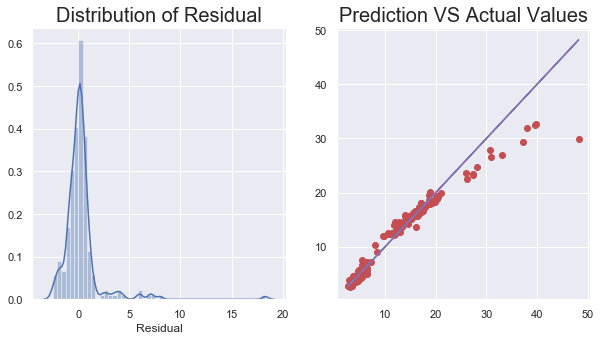

In [571]:
y_test_predict_ridge=model_ridge.predict(x_test)
plt.figure(figsize=(10,5))
# distribution of residual 
plt.subplot(1,2,1)
# distribution of residual
sns.distplot(y_test-y_test_predict_ridge)
plt.title('Distribution of Residual',fontsize=20)
plt.xlabel('Residual')
plt.subplot(1,2,2)
plt.scatter(y_test,y_test_predict_ridge,color='r')
plt.plot(y_test,y_test,color='m')
plt.title('Prediction VS Actual Values',fontsize=20)

## RMSE

In [572]:
ridge_rmse=np.sqrt((1/len(y_test))*(sum((y_test-y_test_predict_ridge)**2)))#**(1/2)
ridge_rmse

1.931405971899933

# Lasso

In [573]:
# # Find the optimal alpha value for Lasso regression
modelasso = LassoCV(alphas=alphas,cv=10,normalize=False)
modelasso.fit(inputs, target)

LassoCV(alphas=[14, 15, 16, 17, 11, 12, 13, 2, 1.6, 1.5, 1.49, 1.48, 1.47, 1.46,
                1.47, 1.4, 1.3, 1.2, 1.1, 1.05, 1.01, 1.0, 0.5, 0.1, 0.05, 0.01,
                0.005, 0.001, 0.0005],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [574]:

# use the best alpha and fit it into model 
model_lasso = Lasso(alpha=modelasso.alpha_,normalize=False)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [575]:
train_score_lasso = model_lasso.score(x_train, y_train)  
test_score_lasso = model_lasso.score(x_test, y_test) 
print("Lasso Regression test score: {:2f}%".format(test_score_lasso* 100))
print("Lasso Regression train score: {:2f}%".format(train_score_lasso * 100))

Lasso Regression test score: 98.354348%
Lasso Regression train score: 98.965353%


Text(0.5, 1.0, 'Prediction VS Actual Values')

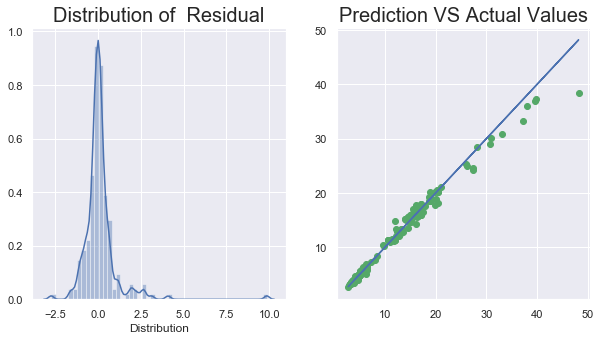

In [576]:

# to get y_test_predict
y_test_predict_lasso=model_lasso.predict(x_test)
plt.figure(figsize=(10,5))
# distribution of residual 
plt.subplot(1,2,1)
sns.distplot(y_test-y_test_predict_lasso)
plt.title('Distribution of  Residual', fontsize=20)
plt.xlabel('Distribution')
plt.subplot(1,2,2)
plt.scatter(y_test,y_test_predict_lasso,color='g')
plt.plot(y_test,y_test)
plt.title('Prediction VS Actual Values',fontsize=20)

# RMSE

In [577]:
lasso_rmse=np.sqrt((1/len(y_test))*(sum(y_test-y_test_predict_lasso)**2))
lasso_rmse

1.6530946743057457

# Model Evaluation

In [386]:
lr_rmse,ridge_rmse,lasso_rmse  # Linear Regression has the lowest RMSE 

(0.967275429124187, 1.931405971899933, 1.6530946743057457)

In [388]:
('Linear Regression test Accuracy: 98.55%',
'Ridge Regression test Accuracy: 94.24%',
'Lasso Regression test score: 98.96%') 

('Linear Regression test Accuracy: 98.55%',
 'Ridge Regression test Accuracy: 94.24%',
 'Lasso Regression train score: 98.96%')

In [394]:
import statsmodels.api as sm

In [405]:
xtest=pd.DataFrame(data=x_test,columns=inputs.columns)

In [414]:
x_test1=sm.add_constant(xtest)

In [422]:
result_test=sm.OLS(list(y_test),x_test1).fit()

In [424]:
result_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 06 May 2020   Prob (F-statistic):          8.65e-186
Time:                        14:48:52   Log-Likelihood:                -137.77
No. Observations:                 214   AIC:                             369.5
Df Residuals:                     167   BIC:                             527.7
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4599      0.436      5.643      0.000       1.599       3.321
gender               -1.2658      0.244     -5.187      0.000      -1.748      -0.784
Age Adjusted Rate    46.1123      0.829     55.627      0.000      44.476      47.749
Butte                -0.2268      0.388     -0.584      0.560      -0.993       0.540
CALIFORNIA           -0.2862      0.232     -1.234      0.219      -0.744       0.172
Calaveras          -5.37e-15      1e-15     -5.344      0.000   -7.35e-15   -3.39e-15
Contra Costa          0.0720      0.247      0.291      0.771      -0.416       0.561
El Dorado             0.9679      0.554      1.746      0.083      -0.126       2.062
Fresno               -0.8140      0.274     -2.976      0.003      -1.354      -0.274
Humboldt              0.3201      0.540      0.593      0.554      -0.746       1.386
Imperial             -0.7759      0.412     -1.883      0.061      -1.589       0.037
Inyo                  7.9626      0.720     11.064      0.000       6.542       9.383
Kern                 -0.9464      0.358     -2.643      0.009      -1.653      -0.239
Lake              -1.461e-14   8.55e-16    -17.088      0.000   -1.63e-14   -1.29e-14
Los Angeles          -0.2995      0.271     -1.105      0.271      -0.834       0.235
Madera              1.71e-14   1.07e-15     15.957      0.000     1.5e-14    1.92e-14
Marin                 3.2913      0.557      5.907      0.000       2.191       4.391
Mendocino             2.5717      0.661      3.890      0.000       1.266       3.877
Merced               -0.8572      0.279     -3.069      0.003      -1.409      -0.306
Monterey             -0.2292      0.268     -0.856      0.393      -0.758       0.300
Napa                 -0.0681      0.353     -0.193      0.847      -0.766       0.629
Nevada               -2.7461      0.591     -4.649      0.000      -3.912      -1.580
Orange               -0.2314      0.258     -0.897      0.371      -0.741       0.278
Placer                0.6019      0.325      1.853      0.066      -0.039       1.243
Plumas            -1.351e-14    7.7e-16    -17.543      0.000    -1.5e-14    -1.2e-14
Riverside            -0.4841      0.237     -2.039      0.043      -0.953      -0.015
Sacramento           -0.3900      0.241     -1.620      0.107      -0.865       0.085
San Bernardino       -1.1198      0.246     -4.548      0.000      -1.606      -0.634
San Diego            -0.3435      0.233     -1.473      0.143      -0.804       0.117
San Francisco         1.0819      0.257      4.206      0.000       0.574       1.590
San Joaquin          -0.5427      0.266     -2.039      0.043      -1.068      -0.017
San Luis Obispo       1.9697      0.379      5.198      0.000       1.221       2.718
San Mateo            -0.0090      0.316     -0.029      0.977      -0.632